In [43]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import data into Data Frame

We're using covidtracking.com for the data.  
Make a get request and convert the json response to a list.

In [31]:
stateData = requests.get('https://covidtracking.com/api/states/daily').json()
print(r)

<Response [200]>


Take a look at the data we are getting.  
stateData is a list of dictionaries containing daily information about state covid cases. 

In [32]:
#Confirm that this is a list
print(type(stateData))

#Print out the first entry from the list
print(stateData[0])

#Confirm that the first entry is a dictionary
print(type(stateData[0]))

#Look at a value by key
print(stateData[0]['date'])


<class 'list'>
{'date': 20200411, 'state': 'AK', 'positive': 257, 'negative': 7475, 'pending': None, 'hospitalizedCurrently': None, 'hospitalizedCumulative': 31, 'inIcuCurrently': None, 'inIcuCumulative': None, 'onVentilatorCurrently': None, 'onVentilatorCumulative': None, 'recovered': 63, 'hash': 'a8d36e9ce19edaeaac989881abf96fc74196efba', 'dateChecked': '2020-04-11T20:00:00Z', 'death': 8, 'hospitalized': 31, 'total': 7732, 'totalTestResults': 7732, 'posNeg': 7732, 'fips': '02', 'deathIncrease': 1, 'hospitalizedIncrease': 3, 'negativeIncrease': 289, 'positiveIncrease': 11, 'totalTestResultsIncrease': 300}
<class 'dict'>
20200411


Turn the data into a Pandas Data Frame and take a look at the first few entries. 

In [51]:
originalStateDF = pd.DataFrame(stateData)
originalStateDF.head()


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200411,AK,257.0,7475.0,NaN,NaN,31.0,NaN,NaN,NaN,...,31.0,7732,7732,7732,02,1.0,3.0,289.0,11.0,300.0
1,20200411,AL,3191.0,18058.0,NaN,NaN,402.0,NaN,NaN,NaN,...,402.0,21249,21249,21249,01,11.0,34.0,0.0,223.0,223.0
2,20200411,AR,1226.0,17352.0,NaN,86.0,130.0,NaN,43.0,33.0,...,130.0,18578,18578,18578,05,1.0,0.0,1403.0,55.0,1458.0
3,20200411,AS,0.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5,3,3,60,0.0,0.0,-17.0,0.0,-17.0
4,20200411,AZ,3393.0,37137.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40530,40530,40530,04,11.0,0.0,2515.0,281.0,2796.0


In [73]:
# Make a new data frame where we will clean up some of the columns
stateDF = pd.DataFrame(stateData)
# Convert the date to a datetime
stateDF['date'] = pd.to_datetime(stateDF['date'].astype(str))
stateDF.head()


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-11,AK,257.0,7475.0,NaN,NaN,31.0,NaN,NaN,NaN,...,31.0,7732,7732,7732,02,1.0,3.0,289.0,11.0,300.0
1,2020-04-11,AL,3191.0,18058.0,NaN,NaN,402.0,NaN,NaN,NaN,...,402.0,21249,21249,21249,01,11.0,34.0,0.0,223.0,223.0
2,2020-04-11,AR,1226.0,17352.0,NaN,86.0,130.0,NaN,43.0,33.0,...,130.0,18578,18578,18578,05,1.0,0.0,1403.0,55.0,1458.0
3,2020-04-11,AS,0.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5,3,3,60,0.0,0.0,-17.0,0.0,-17.0
4,2020-04-11,AZ,3393.0,37137.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40530,40530,40530,04,11.0,0.0,2515.0,281.0,2796.0


## Exploratory data analysis

In [75]:
# make a new data frame for just values in new mexico
nmdf = stateDF.loc[stateDF['state'] == "NM"]


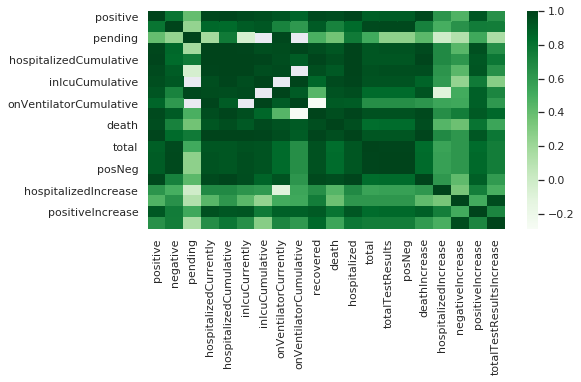

In [76]:
plt.figure(figsize=(8,4))
sns.heatmap(stateDF.corr(), cmap='Greens', annot = False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


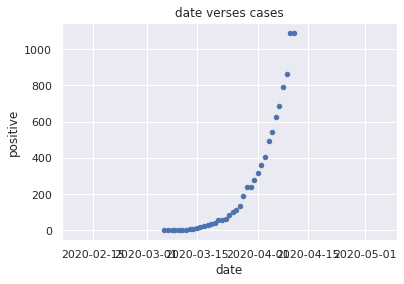

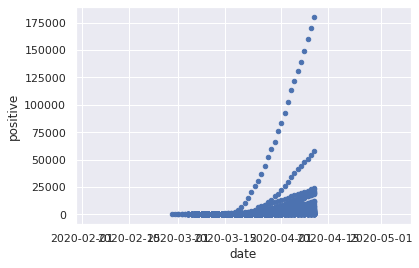

In [78]:
nmdf.plot(kind = 'scatter', x='date', y='positive', title='date verses cases')
stateDF.plot(kind = 'scatter', x='date', y='positive')

In [46]:
stateDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      2056 non-null   int64  
 1   state                     2056 non-null   object 
 2   positive                  2048 non-null   float64
 3   negative                  1904 non-null   float64
 4   pending                   506 non-null    float64
 5   hospitalizedCurrently     333 non-null    float64
 6   hospitalizedCumulative    562 non-null    float64
 7   inIcuCurrently            127 non-null    float64
 8   inIcuCumulative           79 non-null     float64
 9   onVentilatorCurrently     115 non-null    float64
 10  onVentilatorCumulative    22 non-null     float64
 11  recovered                 320 non-null    float64
 12  hash                      2056 non-null   object 
 13  dateChecked               2056 non-null   object 
 14  death   

## Compare testing and death rates

I want to explore differences between testing rates and death rates. Some states have the similar numbers of positive tests, but very different numbers of deaths.  
I want to know if the states that have a higher death to positive test ratio are doing fewer tests.  

I want to look at the ration of positive tests to total tests and the ratio of total tests to population.  

Let's see what we find...